In [2]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.insert(0, 'code/')

In [ ]:
import content_based_concat_attention as attn_concat
sequence_length = attn_concat.sequence_length
content_based_attention_concat = attn_concat.content_based_attention_concat
reference_vector = attn_concat.reference_vector
decoder_output_to_sequence_length = attn_concat.decoder_output_to_sequence_length
criterion = attn_concat.criterion

In [ ]:
attn_concat.train()

In [ ]:
for random_sequence in attn_concat.loader:
    correct_sequence = torch.sort(random_sequence)[1]
    correct_sequence = correct_sequence.long().squeeze(0)
    break

In [ ]:
random_sequence, correct_sequence

In [ ]:
random_sequence_embedding = attn_concat.embedding(random_sequence)
encoder_outputs, (encoder_h, encoder_c) = attn_concat.encoder(random_sequence_embedding)

decoder_outputs = []
similarities = []
attentions = []
decoder_input_h = encoder_h.view(1,1,-1)

for time in range(attn_concat.sequence_length):
    decoder_input_h_repeated = decoder_input_h.repeat(1,sequence_length,1)
    concatenated_tensor = torch.cat([decoder_input_h_repeated, encoder_outputs], dim=2)
    transformed_concatenated_tensor = content_based_attention_concat(concatenated_tensor)
    
    similarity_with_reference_vector = torch.bmm(reference_vector, transformed_concatenated_tensor.transpose(1,2))
    encoder_output_weights = F.softmax(similarity_with_reference_vector, dim=2)
    similarities.append(similarity_with_reference_vector)
    attentions.append(encoder_output_weights)

    weighted_sum_of_encoder_outputs = torch.bmm(encoder_output_weights, encoder_outputs)
    decoder_output_at_time_t, (decoder_h, decoder_c) = attn_concat.decoder(attn_concat.decoder_input, (decoder_input_h, weighted_sum_of_encoder_outputs))
    decoder_outputs.append(decoder_output_at_time_t)
    decoder_input_h = decoder_h
    
decoder_outputs = torch.cat(decoder_outputs, 1)
softmax_input = decoder_output_to_sequence_length(decoder_outputs).squeeze(0)
loss = criterion(softmax_input, correct_sequence)

accurate = (softmax_input.max(1)[1] == correct_sequence).sum()

In [ ]:
for i in range(10):
    print(similarities[i])
    print(F.softmax(similarities[0],dim=2))
    print('====')

In [ ]:
accurate, loss.item()

In [ ]:
list(zip(softmax_input.max(1)[1], correct_sequence))

In [ ]:
attentions_1d = [i.squeeze() for i in attentions]
len(attentions_1d)

In [ ]:
for attn in attentions_1d:
    plt.plot(attn.detach().numpy())

In [ ]:
plt.plot(reference_vector[0,0].detach().numpy())

### Location based attention

In [3]:
import location_based_attention as attn_local

In [14]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(attn_local.test()[0].item())
    
np.mean(accuracy_before)

1.03

In [15]:
attn_local.train()

Loss at iteration 0: 2.30315065
Accuracy in last 100 iterations: 1/10
Loss at iteration 100: 2.27956915
Accuracy in last 100 iterations: 113/1000
Loss at iteration 200: 2.29555345
Accuracy in last 100 iterations: 143/1000
Loss at iteration 300: 2.01904798
Accuracy in last 100 iterations: 167/1000
Loss at iteration 400: 2.06319761
Accuracy in last 100 iterations: 211/1000
Loss at iteration 500: 2.02013636
Accuracy in last 100 iterations: 244/1000
Loss at iteration 600: 1.95110583
Accuracy in last 100 iterations: 246/1000
Loss at iteration 700: 1.76244068
Accuracy in last 100 iterations: 281/1000
Loss at iteration 800: 1.81778586
Accuracy in last 100 iterations: 323/1000
Loss at iteration 900: 1.87071228
Accuracy in last 100 iterations: 300/1000
Loss at iteration 1000: 1.66562080
Accuracy in last 100 iterations: 343/1000
Loss at iteration 1100: 1.73772168
Accuracy in last 100 iterations: 352/1000
Loss at iteration 1200: 1.59243309
Accuracy in last 100 iterations: 391/1000
Loss at iterati

In [16]:
accuracy_after = []
for _ in range(100):
    accuracy_after.append(attn_local.test()[0].item())
    
np.mean(accuracy_after)

8.37

In [17]:
acc, attentions = attn_local.test()

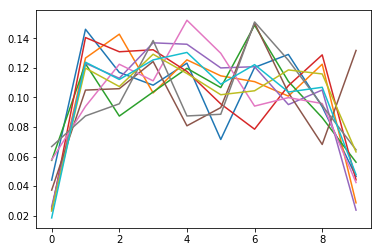

In [27]:
for i in range(10):
    plt.plot(attentions[i][0,0].detach().numpy())

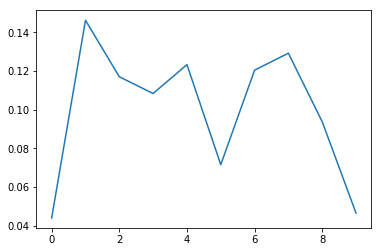

In [28]:
plt.plot(attentions[0][0,0].detach().numpy())